### IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### LOADING THE DATA

In [4]:
df=pd.read_csv('IBM.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-07-23,101.051628,102.246651,100.669212,101.195030,60.314636,6606222
1,2001-07-24,100.239006,101.481834,99.225624,99.913956,59.551090,7635591
2,2001-07-25,99.904396,101.051628,98.212234,100.277245,59.767632,6534990
3,2001-07-26,100.143402,101.338432,98.403442,101.338432,60.400089,8816420
4,2001-07-27,100.143402,101.290634,99.531548,100.095604,59.659351,4546439
...,...,...,...,...,...,...,...
5277,2022-07-14,135.600006,139.429993,135.020004,139.059998,139.059998,5298400
5278,2022-07-15,140.679993,140.679993,138.610001,139.919998,139.919998,4515500
5279,2022-07-18,140.149994,140.309998,137.779999,138.130005,138.130005,8231700
5280,2022-07-19,131.580002,132.559998,127.720001,130.880005,130.880005,29690500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5282 non-null   object 
 1   Open       5282 non-null   float64
 2   High       5282 non-null   float64
 3   Low        5282 non-null   float64
 4   Close      5282 non-null   float64
 5   Adj Close  5282 non-null   float64
 6   Volume     5282 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 289.0+ KB


In [6]:
df=pd.read_csv('IBM.csv',parse_dates=[0],index_col='Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-07-23,101.051628,102.246651,100.669212,101.195030,60.314636,6606222
2001-07-24,100.239006,101.481834,99.225624,99.913956,59.551090,7635591
2001-07-25,99.904396,101.051628,98.212234,100.277245,59.767632,6534990
2001-07-26,100.143402,101.338432,98.403442,101.338432,60.400089,8816420
2001-07-27,100.143402,101.290634,99.531548,100.095604,59.659351,4546439
...,...,...,...,...,...,...
2022-07-14,135.600006,139.429993,135.020004,139.059998,139.059998,5298400
2022-07-15,140.679993,140.679993,138.610001,139.919998,139.919998,4515500
2022-07-18,140.149994,140.309998,137.779999,138.130005,138.130005,8231700


In [7]:
# Verification
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5282 entries, 2001-07-23 to 2022-07-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5282 non-null   float64
 1   High       5282 non-null   float64
 2   Low        5282 non-null   float64
 3   Close      5282 non-null   float64
 4   Adj Close  5282 non-null   float64
 5   Volume     5282 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 288.9 KB


In [8]:
df.sort_index(inplace=True)

### CHECKING NULL VALUES

In [10]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### CHECKING DUPLICATE VALUES

In [12]:
df.duplicated().sum()

0

### Identifying outliers

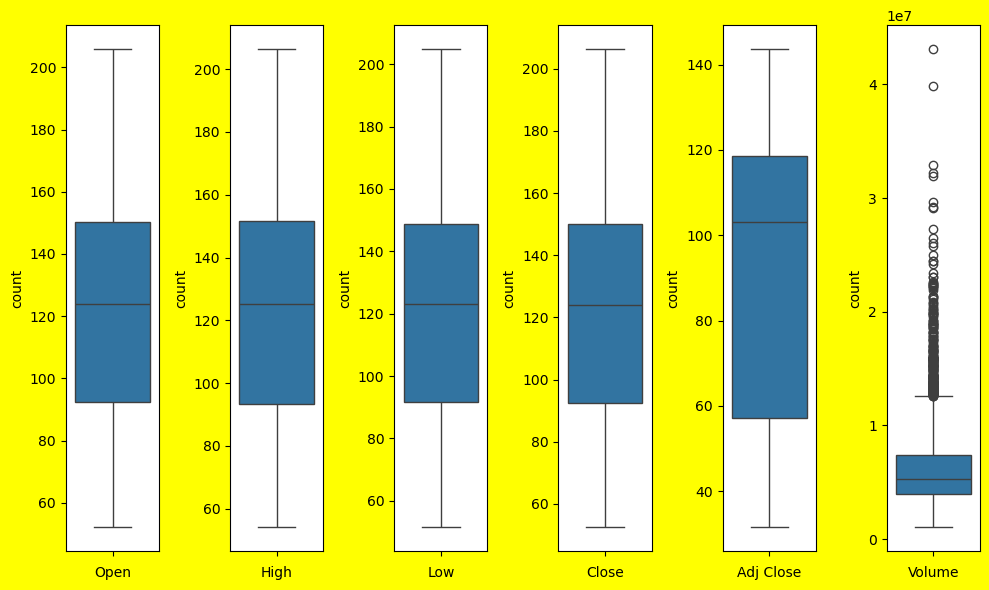

In [14]:
# boxplot to identify outliers
plt.figure(figsize=(10,6),facecolor='yellow')
plotnumber=1
for i in df.columns:
    if plotnumber<=6:
        ax=plt.subplot(1,6,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=10)
        plt.ylabel('count',fontsize=10)
    plotnumber=plotnumber+1

plt.tight_layout()

### HANDLING THE OUTLIERS

In [16]:
from scipy.stats.mstats import winsorize
df['Volume'] = winsorize(df['Volume'], limits=(0, 0.05))

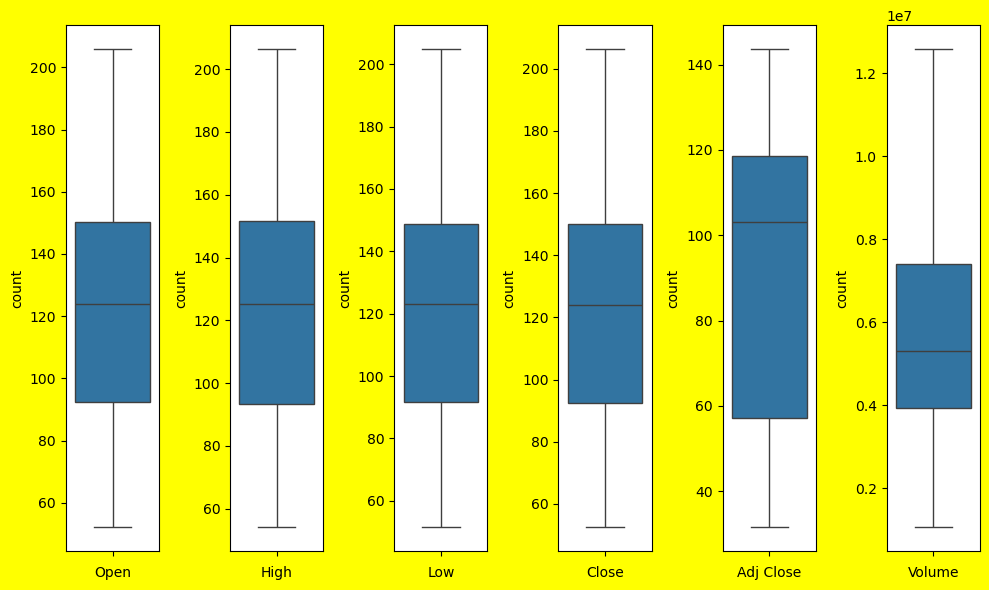

In [17]:
# Verification
plt.figure(figsize=(10,6),facecolor='yellow')
plotnumber=1
for i in df.columns:
    if plotnumber<=6:
        ax=plt.subplot(1,6,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=10)
        plt.ylabel('count',fontsize=10)
    plotnumber=plotnumber+1

plt.tight_layout()

### SCALING FOR NUMERICAL COLUMNS

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [20]:
scaled_df = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)
scaled_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-07-23,-0.686659,-0.681411,-0.671364,-0.684266,-0.986763,0.234652
2001-07-24,-0.709547,-0.702897,-0.712133,-0.720346,-1.010909,0.614582
2001-07-25,-0.718971,-0.714983,-0.740753,-0.710114,-1.004062,0.208361
2001-07-26,-0.712240,-0.706925,-0.735353,-0.680227,-0.984061,1.050415
2001-07-27,-0.712240,-0.708268,-0.703493,-0.715230,-1.007486,-0.525595
...,...,...,...,...,...,...
2022-07-14,0.286423,0.363168,0.298768,0.382148,1.503427,-0.248054
2022-07-15,0.429504,0.398284,0.400157,0.406369,1.530623,-0.537015
2022-07-18,0.414576,0.387890,0.376716,0.355956,1.474018,0.834601


### DATA SPLITTING

In [22]:
x=scaled_df.drop(columns=['Close'])  # Independent variables
x

,Open,High,Low,Adj Close,Volume
Date,,,,,
2001-07-23,-0.686659,-0.681411,-0.671364,-0.986763,0.234652
2001-07-24,-0.709547,-0.702897,-0.712133,-1.010909,0.614582
2001-07-25,-0.718971,-0.714983,-0.740753,-1.004062,0.208361
2001-07-26,-0.712240,-0.706925,-0.735353,-0.984061,1.050415
2001-07-27,-0.712240,-0.708268,-0.703493,-1.007486,-0.525595
...,...,...,...,...,...
2022-07-14,0.286423,0.363168,0.298768,1.503427,-0.248054
2022-07-15,0.429504,0.398284,0.400157,1.530623,-0.537015
2022-07-18,0.414576,0.387890,0.376716,1.474018,0.834601


In [23]:
y=scaled_df['Close']  # Dependent variable
y

Date
2001-07-23   -0.684266
2001-07-24   -0.720346
2001-07-25   -0.710114
2001-07-26   -0.680227
2001-07-27   -0.715230
                ...   
2022-07-14    0.382148
2022-07-15    0.406369
2022-07-18    0.355956
2022-07-19    0.151770
2022-07-20    0.103892
Name: Close, Length: 5282, dtype: float64

### train_test_split for splitting the data

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42,shuffle=False)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3961, 5)
(1321, 5)
(3961,)
(1321,)


### 1. LINEAR REGRESSION

In [27]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
y_pred=linear_model.predict(x_test)
from sklearn.metrics import *
print(f'linear_r2_score :{r2_score(y_test,y_pred)}')
print(f'linear_mean_squared_error:{mean_squared_error(y_test,y_pred)}')
print(f'linear_mean_absolute_error:{mean_absolute_error(y_test,y_pred)}')
print(f'linear_root_mean_square_error:{np.sqrt(mean_squared_error(y_test,y_pred))}')
linear_r2=r2_score(y_test,y_pred)

linear_r2_score :0.9949093776455256
linear_mean_squared_error:0.000553506969472068
linear_mean_absolute_error:0.01776559588415815
linear_root_mean_square_error:0.023526728830674016


### CHECK OVERFITTING

In [29]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(linear_model,x_train,y_train,cv=tscv,scoring="r2")
print(f"R2 Scores: {scores}, Mean: {scores.mean()}, Std Dev: {scores.std()}")
print('\n')
print(f'NO OVERFITTING PRESENT')

R2 Scores: [0.96747576 0.97506416 0.99854384 0.99204983 0.99552714], Mean: 0.9857321452619263, Std Dev: 0.012223715651777316


NO OVERFITTING PRESENT


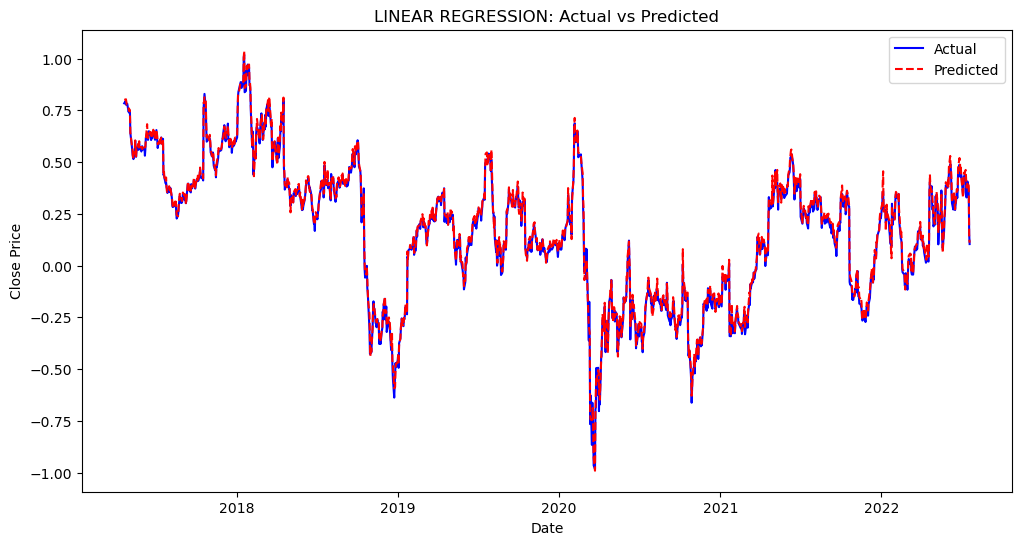

In [30]:
# Improved visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('LINEAR REGRESSION: Actual vs Predicted')
plt.legend()
plt.show()

### 2. RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)
from sklearn.metrics import *
print(f'rf_r2_score :{r2_score(y_test,rf_pred)}')
print(f'rf_mean_squared_error:{mean_squared_error(y_test,rf_pred)}')
print(f'rf_mean_absolute_error:{mean_absolute_error(y_test,rf_pred)}')
print(f'rf_root_mean_square_error:{np.sqrt(mean_squared_error(y_test,rf_pred))}')
rf_r2=r2_score(y_test,rf_pred)

rf_r2_score :0.9926343700844839
rf_mean_squared_error:0.0008008701508189217
rf_mean_absolute_error:0.020910185663009243
rf_root_mean_square_error:0.028299649305581893


### CHECK OVERFITTING

In [34]:
tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(rf_model,x_train,y_train,cv=tscv,scoring="r2")
print(f"R2 Scores: {scores}, Mean: {scores.mean()}, Std Dev: {scores.std()}")
print('\n')
print(f'NO OVERFITTING PRESENT')

R2 Scores: [ 0.93922153  0.90747455 -0.35362407  0.40372839  0.65254978], Mean: 0.5098700382831561, Std Dev: 0.473218275492006


NO OVERFITTING PRESENT


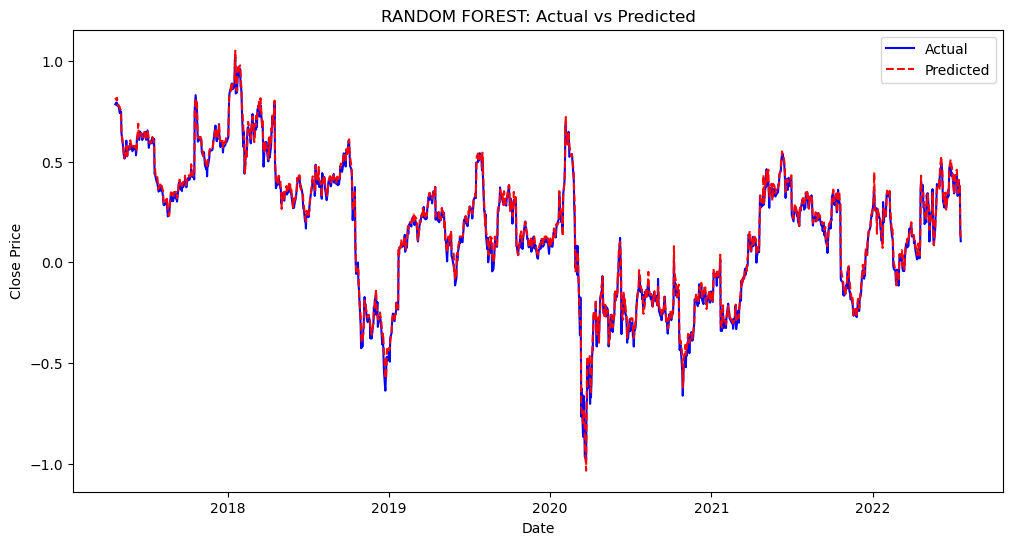

In [35]:
# Improved visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, rf_pred, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('RANDOM FOREST: Actual vs Predicted')
plt.legend()
plt.show()

### 3. XGBOOST

In [37]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor()
xgb_model.fit(x_train,y_train)
xgb_pred=xgb_model.predict(x_test)
from sklearn.metrics import *
print(f'xgb_r2_score :{r2_score(y_test,xgb_pred)}')
print(f'xgb_mean_squared_error:{mean_squared_error(y_test,xgb_pred)}')
print(f'xgb_mean_absolute_error:{mean_absolute_error(y_test,xgb_pred)}')
print(f'xgb_root_mean_square_error:{np.sqrt(mean_squared_error(y_test,xgb_pred))}')
xgb_r2=r2_score(y_test,xgb_pred)

xgb_r2_score :0.9733268214174818
xgb_mean_squared_error:0.0029001935746461433
xgb_mean_absolute_error:0.04493288325711815
xgb_root_mean_square_error:0.05385344533682263


### CHECK OVERFITTING

In [39]:
tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(xgb_model,x_train,y_train,cv=tscv,scoring="r2")
print(f"R2 Scores: {scores}, Mean: {scores.mean()}, Std Dev: {scores.std()}")
print('\n')
print(f'NO OVERFITTING PRESENT')

R2 Scores: [ 0.95066034  0.90232068 -0.38133953  0.25599459  0.70428528], Mean: 0.48638427167099696, Std Dev: 0.49840951392644406


NO OVERFITTING PRESENT


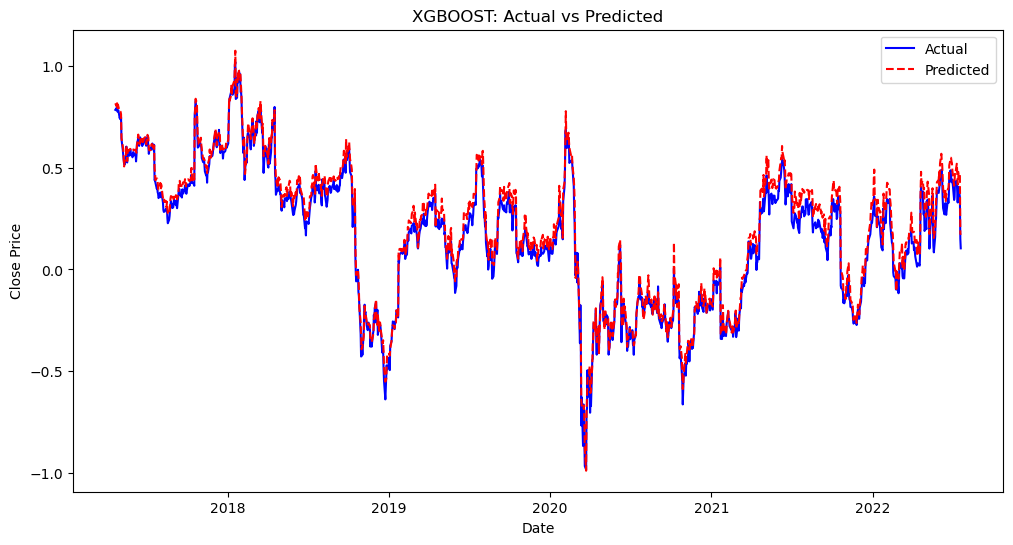

In [40]:
# Improved visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, xgb_pred, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('XGBOOST: Actual vs Predicted')
plt.legend()
plt.show()

### 4. SUPPORT VECTOR MACHINE

In [42]:
from sklearn.svm import SVR
svm_model=SVR()
svm_model.fit(x_train,y_train)
svm_pred=svm_model.predict(x_test)
from sklearn.metrics import *
print(f'svm_r2_score :{r2_score(y_test,svm_pred)}')
print(f'svm_mean_squared_error:{mean_squared_error(y_test,svm_pred)}')
print(f'svm_mean_absolute_error:{mean_absolute_error(y_test,svm_pred)}')
print(f'svm_root_mean_square_error:{np.sqrt(mean_squared_error(y_test,svm_pred))}')
svm_r2=r2_score(y_test,svm_pred)

svm_r2_score :0.8591233843388002
svm_mean_squared_error:0.015317614070423768
svm_mean_absolute_error:0.11158548689659933
svm_root_mean_square_error:0.1237643489476019


### CHECK OVERFITTING

In [44]:
tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(svm_model,x_train,y_train,cv=tscv,scoring="r2")
print(f"R2 Scores: {scores}, Mean: {scores.mean()}, Std Dev: {scores.std()}")
print('\n')
print(f'NO OVERFITTING PRESENT')

R2 Scores: [ 0.97317301  0.96070725 -2.40107998 -1.40435902  0.97655312], Mean: -0.1790011259572671, Std Dev: 1.4422816966278234


NO OVERFITTING PRESENT


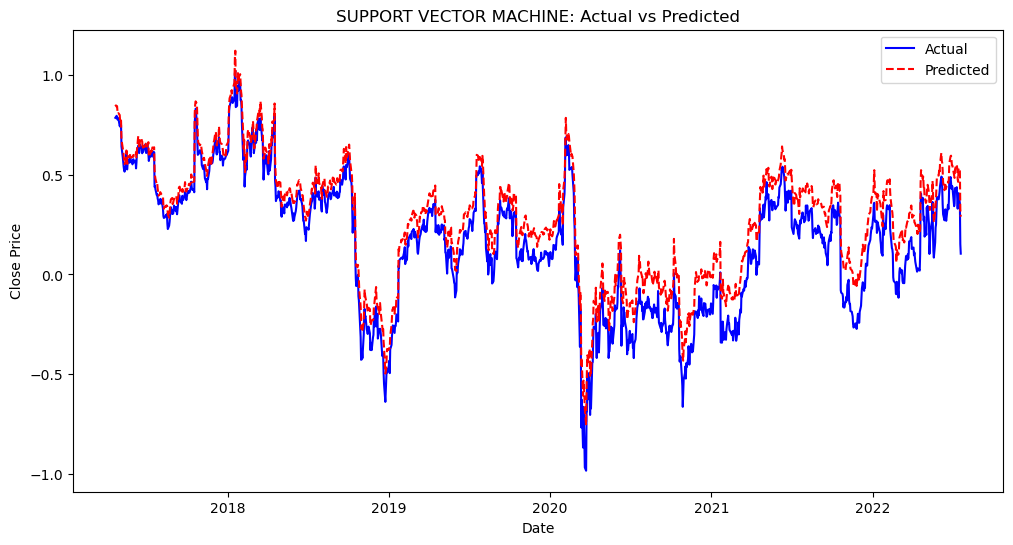

In [45]:
# Improved visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, svm_pred, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SUPPORT VECTOR MACHINE: Actual vs Predicted')
plt.legend()
plt.show()

### 5. ARTIFICIAL NEURAL NETWORK

In [47]:
from sklearn.neural_network import MLPRegressor
ann_model=MLPRegressor()
ann_model.fit(x_train,y_train)
ann_pred=ann_model.predict(x_test)
from sklearn.metrics import *
print(f'ann_r2_score :{r2_score(y_test,ann_pred)}')
print(f'ann_mean_squared_error:{mean_squared_error(y_test,ann_pred)}')
print(f'ann_mean_absolute_error:{mean_absolute_error(y_test,ann_pred)}')
print(f'ann_root_mean_square_error:{np.sqrt(mean_squared_error(y_test,ann_pred))}')
ann_r2=r2_score(y_test,ann_pred)

ann_r2_score :0.7785945520481314
ann_mean_squared_error:0.024073570967747763
ann_mean_absolute_error:0.13920910158316882
ann_root_mean_square_error:0.15515660143141755


### CHECK OVERFITTING

In [49]:
tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(ann_model,x_train,y_train,cv=tscv,scoring="r2")
print(f"R2 Scores: {scores}, Mean: {scores.mean()}, Std Dev: {scores.std()}")
print('\n')
print(f'NO OVERFITTING PRESENT')

R2 Scores: [0.93262487 0.98664294 0.67170634 0.95042867 0.97987976], Mean: 0.9042565162245711, Std Dev: 0.11791744140069547


NO OVERFITTING PRESENT


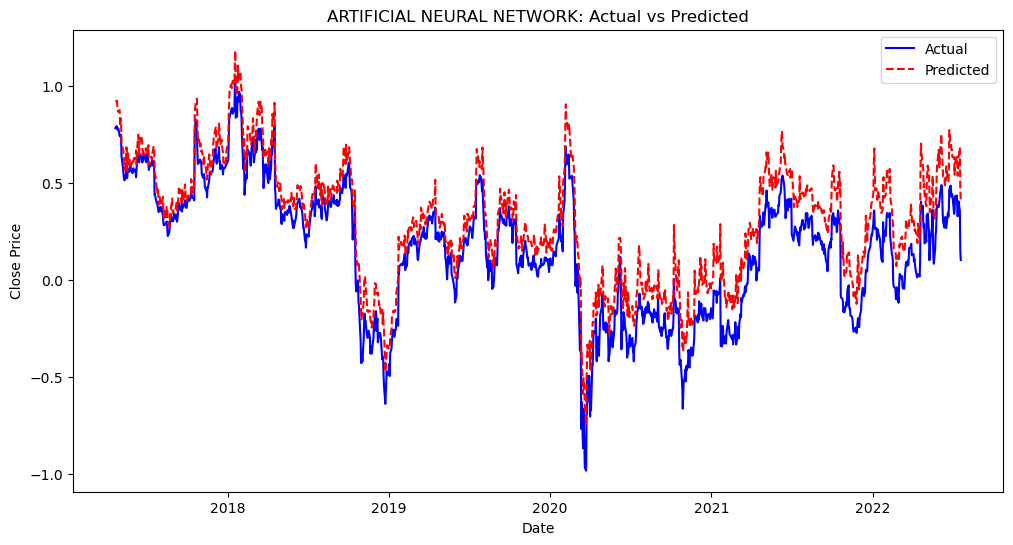

In [50]:
# Improved visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, ann_pred, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARTIFICIAL NEURAL NETWORK: Actual vs Predicted')
plt.legend()
plt.show()

### MODEL COMPARISON REPORT

In [52]:
# Creating a dictionary for models and their R2 scores
comparison_dict = {'Model': ['LinearRegression','RandomForestRegressor','XGBRegressor','SVR','MLPRegressor'],
                   'R2_score': [linear_r2, rf_r2, xgb_r2, svm_r2, ann_r2]}

# Creating DataFrame
comparison_df = pd.DataFrame(comparison_dict)
print(comparison_df)

                   Model  R2_score
0       LinearRegression  0.994909
1  RandomForestRegressor  0.992634
2           XGBRegressor  0.973327
3                    SVR  0.859123
4           MLPRegressor  0.778595


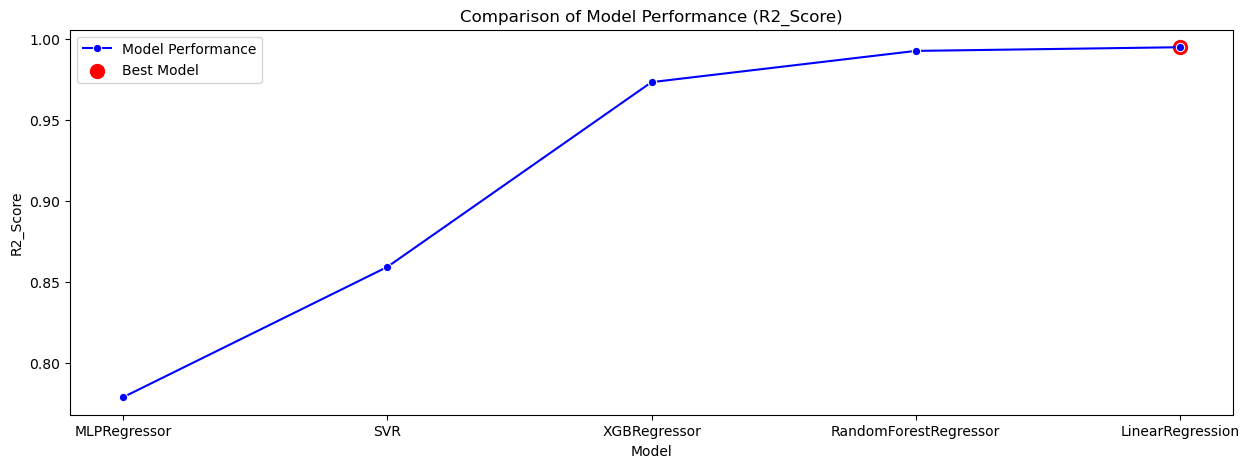

In [53]:
comparison_df = comparison_df.sort_values(by='R2_score', ascending=True)
max_index = comparison_df['R2_score'].idxmax()  # This returns the row index having highest r2_score

plt.figure(figsize=(15, 5))
sns.lineplot(data=comparison_df, x='Model', y='R2_score', marker='o', color='blue', label="Model Performance")
plt.scatter(comparison_df.loc[max_index, 'Model'], comparison_df.loc[max_index, 'R2_score'],color='red', s=100, label="Best Model")

plt.xlabel("Model")
plt.ylabel("R2_Score")
plt.legend()
plt.title("Comparison of Model Performance (R2_Score)")
plt.show()

### CONCLUSION

####  For this specific dataset and task, the LINEAR REGRESSION is the most effective model. Suggests it captures the underlying patterns in the data most accurately.

####  Linear regression model achieving a 99% R-squared score on IBM stock price prediction (up to December 2023) without overfitting, and the plot of actual vs predicted values shows a very close alignment.